Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.
<br>
Delivery_time -> Predict delivery time using sorting time 


In [87]:
import pandas as pd
import seaborn as sns

In [88]:
data = pd.read_csv("delivery_time.csv")

In [89]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# EDA And Data Visualization.

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [91]:
data.shape

(21, 2)

In [92]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [93]:
data.duplicated().sum() #there are no duplicates in data set

0

In [94]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


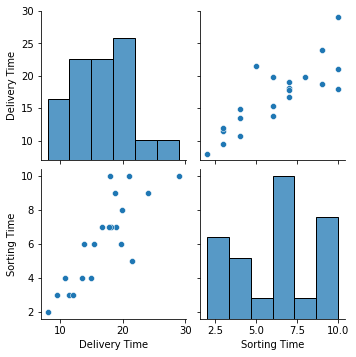

In [95]:
sns.pairplot(data)

In [96]:
data = data.rename({'Delivery Time':'Delivery_Time', 'Sorting Time':'Sorting_Time'},axis = 1)
data.head()

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


### Log And SQRT Transformation:- 

C:\Users\ajayk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


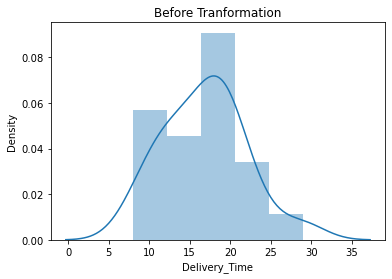

In [97]:
import numpy as np
import matplotlib.pyplot as plt
sns.distplot(data["Delivery_Time"])
plt.title("Before Tranformation")
plt.show()

C:\Users\ajayk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


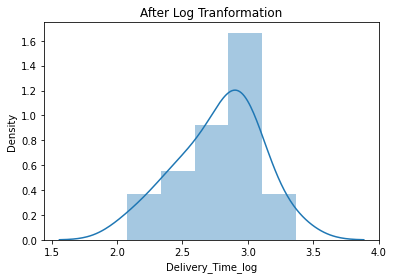

In [98]:
data["Delivery_Time_log"] = np.log(data["Delivery_Time"])
sns.distplot(data["Delivery_Time_log"])
plt.title("After Log Tranformation")
plt.show()

C:\Users\ajayk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


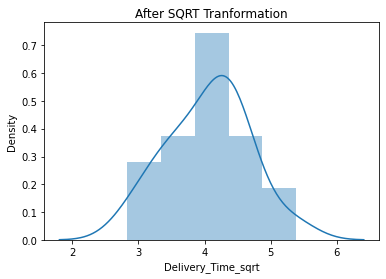

In [99]:
data["Delivery_Time_sqrt"] = np.sqrt(data["Delivery_Time"])
sns.distplot(data["Delivery_Time_sqrt"])
plt.title("After SQRT Tranformation")
plt.show()

C:\Users\ajayk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


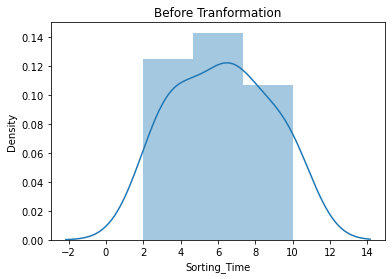

In [100]:
sns.distplot(data["Sorting_Time"])
plt.title("Before Tranformation")
plt.show()

C:\Users\ajayk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


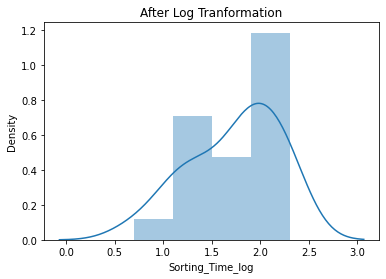

In [101]:
data["Sorting_Time_log"] = np.log(data["Sorting_Time"])
sns.distplot(data["Sorting_Time_log"])
plt.title("After Log Tranformation")
plt.show()

C:\Users\ajayk\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


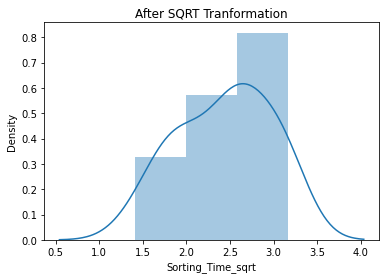

In [103]:
data["Sorting_Time_sqrt"] = np.sqrt(data["Sorting_Time"])
sns.distplot(data["Sorting_Time_sqrt"])
plt.title("After SQRT Tranformation")
plt.show()

In [104]:
data.head()

,Delivery_Time,Sorting_Time,Delivery_Time_log,Delivery_Time_sqrt,Sorting_Time_log,Sorting_Time_sqrt
0,21.00,10,3.044522,4.582576,2.302585,3.162278
1,13.50,4,2.602690,3.674235,1.386294,2.000000
2,19.75,6,2.983153,4.444097,1.791759,2.449490
3,24.00,9,3.178054,4.898979,2.197225,3.000000
4,29.00,10,3.367296,5.385165,2.302585,3.162278


# Simple Linear Regression Model

<AxesSubplot:xlabel='Sorting_Time', ylabel='Delivery_Time'>

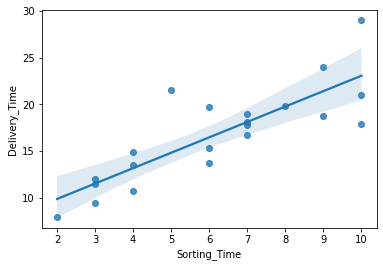

In [105]:
import statsmodels.formula.api as smf
model = smf.ols("Delivery_Time ~ Sorting_Time",data = data).fit()
sns.regplot(x="Sorting_Time",y="Delivery_Time",data = data)

In [106]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 09 Aug 2022   Prob (F-statistic):           3.98e-06
Time:                        13:37:08   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='Sorting_Time_log', ylabel='Delivery_Time_log'>

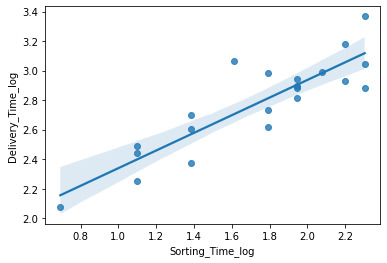

In [107]:
model_log = smf.ols("Delivery_Time_log ~ Sorting_Time_log",data = data).fit()
sns.regplot(x="Sorting_Time_log",y="Delivery_Time_log",data = data)

In [108]:
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Delivery_Time_log   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Tue, 09 Aug 2022   Prob (F-statistic):           1.60e-07
Time:                        13:37:21   Log-Likelihood:                 10.291
No. Observations:                  21   AIC:                            -16.58
Df Residuals:                      19   BIC:                            -14.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.7420      0.133     13.086      0.000       1.463       2.021
Sorting_Time_log     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='Sorting_Time_sqrt', ylabel='Delivery_Time_sqrt'>

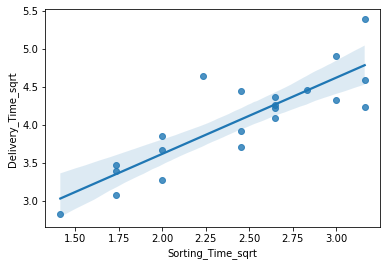

In [109]:
model_sqrt = smf.ols("Delivery_Time_sqrt ~ Sorting_Time_sqrt",data = data).fit()
sns.regplot(x="Sorting_Time_sqrt",y="Delivery_Time_sqrt",data = data)

In [110]:
model_sqrt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Delivery_Time_sqrt   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     51.16
Date:                Tue, 09 Aug 2022   Prob (F-statistic):           8.48e-07
Time:                        13:37:30   Log-Likelihood:                -5.7320
No. Observations:                  21   AIC:                             15.46
Df Residuals:                      19   BIC:                             17.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.6135      0.349      4.628      0.000       0.884       2.343
Sorting_Time_sqrt     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [111]:
df = {'Models':['Model','Model_Log','Model_sqrt'],'Rsquared':[model.rsquared,model_log.rsquared,model_sqrt.rsquared]}
Table = pd.DataFrame(df)
Table

,Models,Rsquared
0,Model,0.682271
1,Model_Log,0.772161
2,Model_sqrt,0.729201


# Prediction of Model

In [112]:
new_data = pd.Series([10,6])
new_data

0    10
1     6
dtype: int64

In [113]:
data_pred = pd.DataFrame(new_data,columns = ["Sorting_Time_log"])
data_pred

,Sorting_Time_log
0,10
1,6


In [114]:
model_log.predict(data_pred)

0    7.717210
1    5.327121
dtype: float64